I ran the following notebook in a docker container with the following commands:

```
docker run -it -p 8888:8888 -p 6006:6006 -v `pwd`:/space/ -w /space/ --rm --name md waleedka/modern-deep-learning jupyter notebook --ip=0.0.0.0 --allow-root
```

In [1]:
%%bash
pip install seaborn
pip install tables

  Running setup.py bdist_wheel for seaborn: started
  Running setup.py bdist_wheel for seaborn: finished with status 'done'
  Stored in directory: /root/.cache/pip/wheels/29/af/4b/ac6b04ec3e2da1a450e74c6a0e86ade83807b4aaf40466ecda
Successfully built seaborn


In [10]:
%%bash
pip install xgboost

  Running setup.py bdist_wheel for xgboost: started
  Running setup.py bdist_wheel for xgboost: finished with status 'done'
  Stored in directory: /root/.cache/pip/wheels/ca/b3/02/d44d5e12c5c1eecff4a822555bac96b182551cd5e13c4795f6
Successfully built xgboost


In [37]:
%%bash
DEBIAN_FRONTEND=nonteractive apt-get install -y graphviz
pip install graphviz

Reading package lists...
Building dependency tree...
Reading state information...
graphviz is already the newest version (2.38.0-12ubuntu2.1).
0 upgraded, 0 newly installed, 0 to remove and 1 not upgraded.


In [55]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
%%bash
pwd

/space/dl


In [7]:
trainData = pd.read_csv('./higgs_data/training.zip')

In [8]:
trainData.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,...,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,s
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,...,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,2.233584,b
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,...,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,2.347389,b
3,100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,5.446378,b
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,6.245333,b


In [12]:
testData = pd.read_csv('./higgs_data/test.zip')

In [13]:
testData.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
0,350000,-999.000,79.589,23.916,3.036,-999.000,-999.000,-999.000,0.903,3.036,...,2.022,98.556,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,-0.000
1,350001,106.398,67.490,87.949,49.994,-999.000,-999.000,-999.000,2.048,2.679,...,-1.138,176.251,1,47.575,-0.553,-0.849,-999.000,-999.000,-999.000,47.575
2,350002,117.794,56.226,96.358,4.137,-999.000,-999.000,-999.000,2.755,4.137,...,-1.868,111.505,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000
3,350003,135.861,30.604,97.288,9.104,-999.000,-999.000,-999.000,2.811,9.104,...,1.172,164.707,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000
4,350004,74.159,82.772,58.731,89.646,1.347,536.663,-0.339,1.028,77.213,...,-0.231,869.614,3,254.085,-1.013,-0.334,185.857,0.335,2.587,599.213


In [11]:
import xgboost as xgb

In [25]:
X,y = trainData.loc[:, 'DER_mass_MMC':'PRI_jet_all_pt'], trainData.loc[:, 'Label']

In [26]:
X.head()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
0,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,197.760,...,-0.277,258.733,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497
1,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,125.157,...,-1.916,164.546,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226
2,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,197.814,...,-2.186,260.414,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251
3,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,75.968,...,0.060,86.062,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000
4,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,57.983,...,-0.871,53.131,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000


In [27]:
y.head()

0    s
1    b
2    b
3    b
4    b
Name: Label, dtype: object

In [28]:
xgbc = xgb.XGBClassifier()

In [29]:
xgbc.fit(X, y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

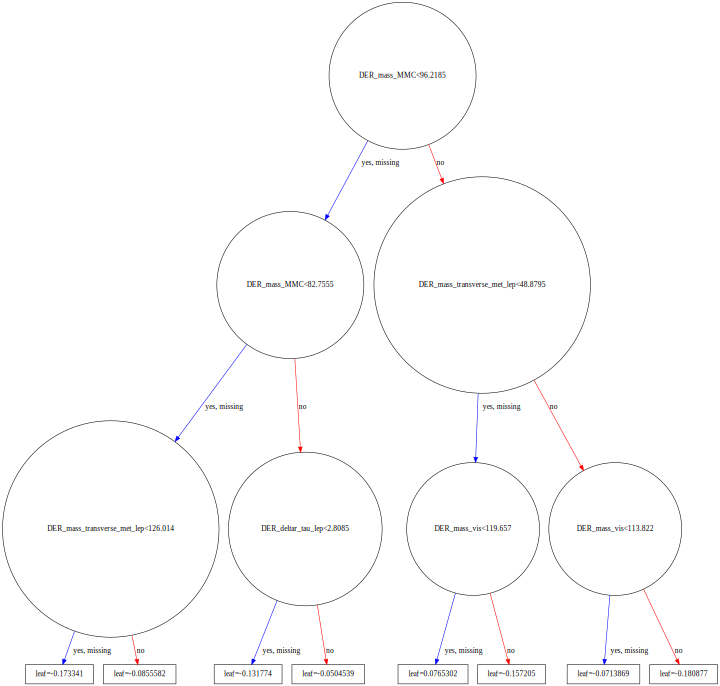

In [70]:
g = xgb.to_graphviz(xgbc)
g.attr('graph', size='10,10')
g

In [47]:
correct = xgbc.predict(trainData.loc[0:100, 'DER_mass_MMC':'PRI_jet_all_pt']) == trainData.loc[0:100, 'Label']

/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [49]:
np.sum(correct)/len(correct)

0.8217821782178217

In [50]:
xgbc2 = xgb.XGBClassifier(max_depth=10)

In [51]:
xgbc2.fit(X, y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=10, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

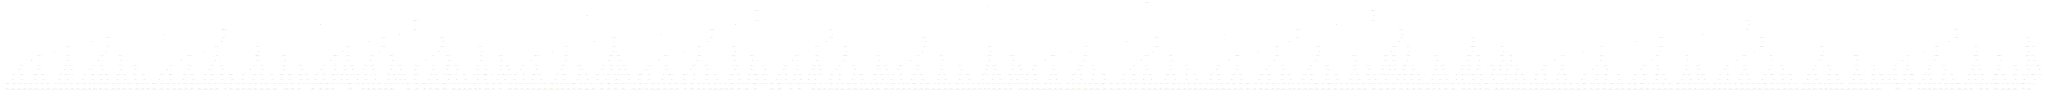

In [75]:
g = xgb.to_graphviz(xgbc2)
g.attr('graph', size='1000,10')
g.attr('node', shape='box')
g

In [53]:
correct = xgbc2.predict(trainData.loc[0:100, 'DER_mass_MMC':'PRI_jet_all_pt']) == trainData.loc[0:100, 'Label']
np.sum(correct)/len(correct)

/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.8712871287128713

In [54]:
xgbc2.predict_proba(trainData.loc[0:10, 'DER_mass_MMC':'PRI_jet_all_pt'])

array([[0.41510922, 0.5848908 ],
       [0.838801  , 0.16119897],
       [0.9724475 , 0.02755247],
       [0.90415955, 0.09584044],
       [0.98451626, 0.01548374],
       [0.94050723, 0.05949274],
       [0.35527062, 0.6447294 ],
       [0.08609939, 0.9139006 ],
       [0.85850877, 0.14149123],
       [0.1633398 , 0.8366602 ],
       [0.9640101 , 0.03598986]], dtype=float32)

In [76]:
xgbc3 = xgb.XGBClassifier(max_depth=20)
xgbc3.fit(X, y)
correct = xgbc3.predict(trainData.loc[0:100, 'DER_mass_MMC':'PRI_jet_all_pt']) == trainData.loc[0:100, 'Label']
np.sum(correct)/len(correct)

/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


1.0

In [89]:
import math
def AMS(y):
    b, s = y[0], y[1]
    assert s >= 0
    assert b >= 0
    bReg = 10.
    return math.sqrt(2 * ((s + b + bReg) * 
                          math.log(1 + s / (b + bReg)) - s))

In [98]:
xgbc3.predict_proba(trainData.loc[0:9, 'DER_mass_MMC':'PRI_jet_all_pt'])

array([[0.08023632, 0.9197637 ],
       [0.97143394, 0.02856608],
       [0.99006224, 0.00993778],
       [0.96714103, 0.03285896],
       [0.99547076, 0.00452922],
       [0.9934568 , 0.00654322],
       [0.05691648, 0.9430835 ],
       [0.03037059, 0.9696294 ],
       [0.9690122 , 0.03098778],
       [0.03955019, 0.9604498 ]], dtype=float32)

In [99]:
xgbc3.predict(trainData.loc[0:9, 'DER_mass_MMC':'PRI_jet_all_pt'])

/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


array(['s', 'b', 'b', 'b', 'b', 'b', 's', 's', 'b', 's'], dtype=object)

In [114]:
arr = np.apply_along_axis(AMS, 1, xgbc3.predict_proba(trainData.loc[0:9, 'DER_mass_MMC':'PRI_jet_all_pt']))

In [115]:
arg = np.argsort(arr)

In [116]:
arr

array([0.28544893, 0.00862046, 0.00299725, 0.00991723, 0.0013658 ,
       0.00197325, 0.29290896, 0.30141515, 0.00935196, 0.29847199])

In [117]:
arg

array([4, 5, 2, 1, 8, 3, 0, 6, 9, 7])

In [118]:
[arr[arg[i]] for i in range(0, 10)]

[0.0013658040380662305,
 0.001973246098099398,
 0.002997251158250363,
 0.00862045894890017,
 0.009351960903985894,
 0.009917233793342643,
 0.2854489314416437,
 0.2929089579181195,
 0.298471992329502,
 0.30141515081455705]

In [119]:
np.sort(arr)

array([0.0013658 , 0.00197325, 0.00299725, 0.00862046, 0.00935196,
       0.00991723, 0.28544893, 0.29290896, 0.29847199, 0.30141515])

In [120]:
np.sort(arr) == arr[arg]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [121]:
testX = testData.loc[:, 'DER_mass_MMC':'PRI_jet_all_pt']

In [122]:
testAMS = np.apply_along_axis(AMS, 1, xgbc3.predict_proba(testX))

In [123]:
testY = xgbc3.predict(testX)

/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [129]:
testEventId = testData.loc[:, 'EventId']
len(testEventId)

550000

In [130]:
testAMSArgSort = np.argsort(testAMS)
len(testAMSArgSort)

550000

In [132]:
# https://www.kaggle.com/c/higgs-boson#evaluation
submission = pd.DataFrame({
    'EventId': testEventId[testAMSArgSort],
    'RankOrder': np.arange(1, 550001, dtype=int),
    'Class': testY[testAMSArgSort]
})

In [141]:
submission.to_csv('higgs_data/submission.csv', sep=',', encoding='utf-8', index=False, columns=['EventId','RankOrder','Class'
])

In [138]:
submission.head()

,Class,EventId,RankOrder
187994,b,537994,1
530627,b,880627,2
348227,b,698227,3
336511,b,686511,4
337778,b,687778,5
